## moments_PS

# Moment Calculator in Processing System (PS)



<img src="resizenb.png" width="800" height="650"/>

## Contents    
 
* Moment Calculating with using PIL library
* Import libraries
* Create an Image object
* Display the image
* Change the image size
* Display final image
* References





## Import libraries

1. **PIL** library to load and resize the image   
2. **numpy** to store the pixel array of the image
3. **IPython.display** to show the image in the notebook 

In [10]:
from PIL import Image
import numpy as np
from IPython.display import display

## Create an Image object
We will load image from the SD card and create an Image object.

In [16]:
image_path = "Moment.png"
original_image = Image.open(image_path)
original_image.load()

We now create a numpy array of the pixels.

In [17]:
input_array = np.array(original_image)

## Display the image

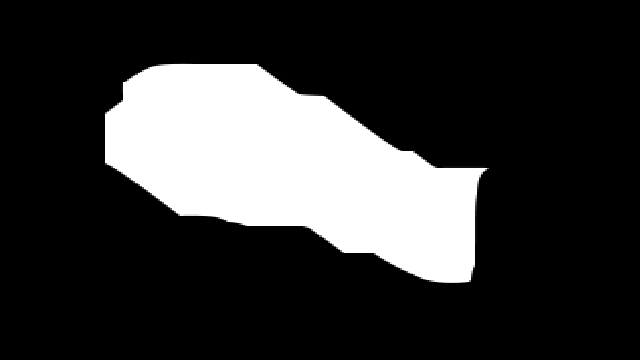

In [18]:
input_image = Image.fromarray(input_array)
display(input_image)

Let's double-check the original image size.

In [19]:
old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))

Image size: 640x360 pixels.


## Change the image size
We will set image resize dimensions.

In [20]:
resize_factor = 2
new_width = int(old_width/resize_factor)
new_height = int(old_height/resize_factor)

We will use `resize()` method from the PIL library.
We map multiple input pixels to a single output pixels to downscale the image   
The Python Imaging Library provides different resampling filters. We use the default: NEAREST   
Pick one nearest pixel from the input image. Ignore all other input pixels.

In [21]:
resized_image = original_image.resize((new_width, new_height))

## Display final image

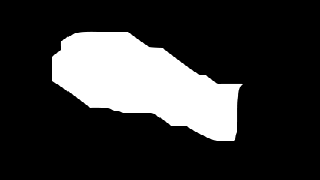

In [22]:
output_array = np.array(resized_image)
result = Image.fromarray(output_array)
display(result)

Let's check the resized image size.

In [23]:
width, height = resized_image.size
print("Resized image size: {}x{} pixels.".format(width, height))

Resized image size: 320x180 pixels.


We can time the resize in software operation.

In [25]:
%%timeit
resized_image = original_image.resize((new_width, new_height), Image.BILINEAR)

10 loops, best of 3: 41.8 ms per loop


# Find Moment

In [3]:
import cv2
import numpy as np 
import math # for tan
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True

m00 = 0
m01 = 0
m10 = 0
m11 = 0
m02 = 0
m20 = 0

for r in range(1080):
    for c in range(1920):
        m00 += 1
        m01 += c
        m10 += r
        m11 += r*c
        m02 += c*c
        m20 += r*r

print('m00:',m00, np.ceil(np.log(m00)/np.log(2)))
print('m01:',m01, np.ceil(np.log(m01)/np.log(2)))
print('m10:',m10, np.ceil(np.log(m10)/np.log(2)))
print('m11:',m11, np.ceil(np.log(m11)/np.log(2)))
print('m02:',m02, np.ceil(np.log(m02)/np.log(2)))
print('m20:',m20, np.ceil(np.log(m20)/np.log(2)))

m00: 2073600 21.0
m01: 1989619200 31.0
m10: 1118707200 31.0
m11: 1073399558400 40.0
m02: 2546049369600 42.0
m20: 805096281600 40.0


In [4]:
def calcmoments(img):
    # function to calculate moments
    moments = np.zeros(6, dtype=int) # Moments : [ m00, m01, m10, m11, m02, m20 ]
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if (img[y,x] & 128): # check if 7th bit is '1', it is set for all gray values >=128
                moments[0] += 1
                moments[1] += y
                moments[2] += x
                moments[3] += x*y
                moments[4] += y*y
                moments[5] += x*x
    return moments
    
    
def calcthetacXcY(m):
    # calculate cX,cY,theta of blob
    cxytheta = np.zeros(3, dtype=float) # cxytheta : [ cX, cY, theta ]

    if m[0] > 0:
        cxytheta[0] = int(m[2]/m[0])
        cxytheta[1] = int(m[1]/m[0])
        mu11 = (m[3]/m[0])-cxytheta[0]*cxytheta[1]
        mu02 = (m[4]/m[0])-cxytheta[1]**2
        mu20 = (m[5]/m[0])-cxytheta[0]**2
        sub = mu20-mu02
        mult = 2*mu11
        cxytheta[2] = 0.5 *  math.atan2( mult , sub )
        #cxytheta[3] = 0.5 *  math.atan( mult / sub )
    
    return cxytheta


In [6]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

#i = 0
#new_img = cv2.imread('pics/Block'+str(i)+'.png',0)

#cv2.imshow("resize", test)
#cv2.waitKey(0)
#cv2.destroyWindow("resize")
#test.shape

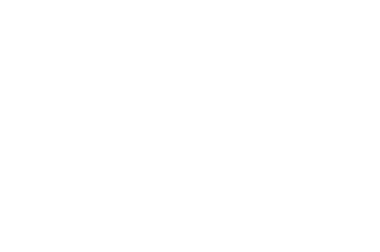

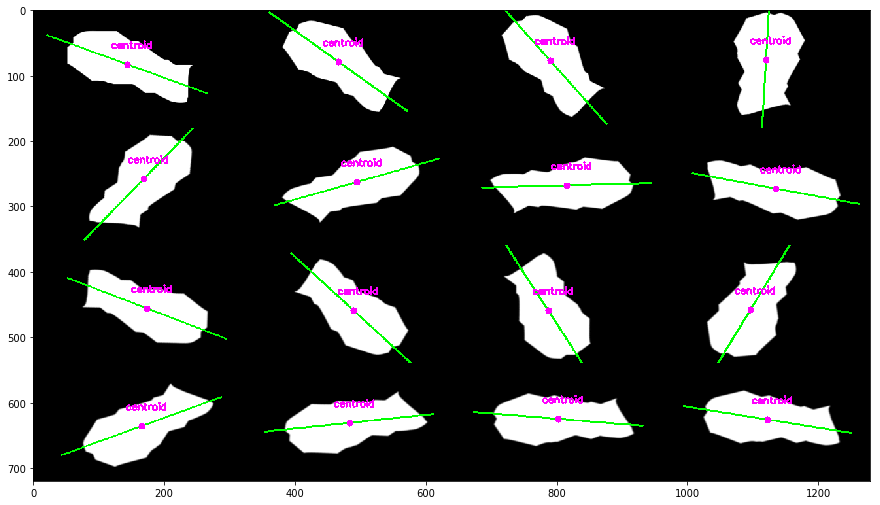

In [7]:
tiles = 4
rows = 180
cols = 320
hugeImg = np.zeros( (4*rows, 4*cols, 3), np.uint8)
# print(hugeImg.shape)

# cv::Mat small_image;
# cv::Mat big_image;
# ...
# //Somehow fill small_image and big_image with your data
# ...
# small_image.copyTo(big_image(cv::Rect(x,y,small_image.cols, small_image.rows)));

text_file = open("out.gold.dat", "w")

for i in np.arange(16):
    new_img = cv2.imread('pics/Block'+str(i)+'.png',0)
    img = cv2.resize (new_img,(320,180))
    m = calcmoments(img) # Moments : [ m00, m01, m10, m11, m20, m02 ]
    #print("Moments: m00: {} m01: {} m10: {} m11: {} m02: {} m20 {}".format(m[0],m[1],m[2],m[3],m[4],m[5]))
    
    cxytheta = calcthetacXcY(m) # cxytheta : [ cX, cY, theta ]
    testi = 'Center X {0:d}, Center Y {1:d}, Angle tan2 {2:.2f}°\n'.format(int(cxytheta[0]),int(cxytheta[1]),np.degrees(cxytheta[2]))
    
    
    n = text_file.write(testi)

    
    # visu
    # create line through center point
    length = 130
    x1 = cxytheta[0] + length * math.cos(cxytheta[2])
    y1 = cxytheta[1] + length * math.sin(cxytheta[2]) 
    x2 = cxytheta[0] - length * math.cos(cxytheta[2])
    y2 = cxytheta[1] - length * math.sin(cxytheta[2]) 
 
    color_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    lineThickness = 2
    cv2.line(color_image, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), lineThickness)
    cv2.circle(color_image, (int(cxytheta[0]), int(cxytheta[1])), 5, (255, 0, 255), -1)
    cv2.putText(color_image, "centroid", (int(cxytheta[0]) - 25, int(cxytheta[1]) - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)
    
    # copy images into large result image
    rpos = int(i/4)*rows
    cpos = i%4*cols
    hugeImg[rpos:rpos+rows, cpos:cpos+cols] = color_image

text_file.close()    

# display plot in notebook
%matplotlib inline
plt.axis("off")
plt.figure(figsize=(15,15))
plt.imshow(hugeImg)
plt.savefig('goldenref.png')
plt.show()


# not needed! display the image in opencv
#cv2.namedWindow("main", cv2.WINDOW_NORMAL)
#cv2.imshow("main", hugeImg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [8]:
testi = 'Center X {0:.2f}, Center Y {1:.2f}, Angle tan2 {2:.2f}°'.format(cxytheta[0],cxytheta[1],np.degrees(cxytheta[2]))
testi

'Center X 163.00, Center Y 86.00, Angle tan2 9.27°'

# References

https://pillow.readthedocs.io/en/3.1.x/index.html   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/python_environment.ipynb   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks.ipynb   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks_advanced_features.ipynb   
https://pillow.readthedocs.io/en/latest/handbook/concepts.html#filters